# 개념정리
## datetime 오브젝트

- datetime 라이브러리 : 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
- date(날짜 처리), time(시간 처리), datetime(날짜&시간 처리)
- 시간 계산 가능


  
- to_datetime : 문자열을 datetime 오브젝트로 변환 (시계열 데이터를 경우에 따라 문자열로 저장한 경우) - 시간 형식 지정자 (%d,%m,%y) 와 기호 (/,-) 를 적절히 조합해 format 인자에 전달하면 그 형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있음.
- now 메서드 : 정밀 단위 시간 표현 - 원하는 시계열 데이터가 대략적인 연도, 월, 일 뿐일 경우에는 now 메서드로 얻어낸 시계열 데이터를 잘라내야 함.
- parse_dates : datetime 오브젝트로 변환하고자 하는 열을 지정하여 데이터 집합을 불러오는 간단한 방법
- year,month,day : 년,월,일
- dt 접근자 사용하기 : datetime의 속성이나 메서드를 사용하여 시계열 데이터 처리 가능.


- 시간 형식 지정자 (p.245-246) 참고하기

In [1]:
from datetime import datetime

In [3]:
now1 = datetime.now()
print(now1)

2025-03-24 00:01:41.011508


- now.today : 현재 시간 출력 가능

In [5]:
now2 = datetime.today()
print(now2)

2025-03-24 00:01:51.568244


In [203]:
#시간을 직접 입력하여 인자로 전달

t1 = datetime.now()
t2 = datetime(1970,1,1)
t3 = datetime(1970,12,12,13,24,34)

print(t1)
print(t2)
print(t3)

2025-03-24 12:31:41.777120
1970-01-01 00:00:00
1970-12-12 13:24:34


In [9]:
diff1 = t1 - t2

print(diff1)
print(type(diff1))

20171 days, 0:02:36.147176
<class 'datetime.timedelta'>


In [11]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-20172 days, 23:57:23.852824
<class 'datetime.timedelta'>


In [13]:
import pandas as pd
import os

ebola = pd.read_csv('/Users/josoobin/documents/data/country_timeseries.csv')

In [15]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [17]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [19]:
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})
test_df1['date_dtl'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dtl   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [21]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


In [27]:
now = datetime.now()
print(now)

2025-03-24 00:12:11.798480


In [29]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2025-03-24


In [31]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

00:12:11


In [33]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2025-03-24 00:12:11


In [35]:
ebola1 = pd.read_csv('/Users/josoobin/documents/data/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [39]:
date_series = pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [41]:
print(d1[0].year)

2018


In [43]:
print(d1[0].month)

5


In [45]:
print(d1[0].day)

16


In [49]:
ebola = pd.read_csv('/Users/josoobin/documents/data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [55]:
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [57]:
print(ebola['date_dt'][3].year)

2015


In [59]:
print(ebola['date_dt'][3].month)

1


In [61]:
print(ebola['date_dt'][3].day)

2


In [63]:
ebola['year'] = ebola['date_dt'].dt.year

print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [65]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [67]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 사례별 시계열 데이터 계산하기 
## 에볼라 발병일 계산

- 데이터가 시간 역순으로 정렬 : 데이터프레임의 마지막부터 살펴야 시간 순으로 데이터 확인 가능
- 에볼라의 진행 정도 확인 : Date열에서 에볼라의 최초 발병일(min 메서드 이용) 을 빼면 가능

In [69]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [71]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [73]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


## 파산한 은행의 개수 계산하기

- closing 'Date' , updated 'Date' : 시계열 데이터임을 확인 가능
- 시계열 데이터가 문자열 이므로 parse_dates 속성 이용하여 datetime으로 변환해서 살피기
- dt 접근자와 quarter 속성을 이용하면 은행의 파산 분기 알 수 있음
- groupby : '연도' 변수를 넣어주면 연도 별로 파산한 은행 개수를 알 수 있음 (그룹화 함수)

In [75]:
banks = pd.read_csv('/Users/josoobin/documents/data/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [77]:
banks_no_dates = pd.read_csv('/Users/josoobin/documents/data/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [79]:
banks = pd.read_csv('/Users/josoobin/documents/data/banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


/var/folders/7x/pz16cm357p9g4lfwv8fcq6fw0000gn/T/ipykernel_1577/1342599087.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/Users/josoobin/documents/data/banklist.csv', parse_dates=[5,6])
/var/folders/7x/pz16cm357p9g4lfwv8fcq6fw0000gn/T/ipykernel_1577/1342599087.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/Users/josoobin/documents/data/banklist.csv', parse_dates=[5,6])


In [83]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [85]:
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [87]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

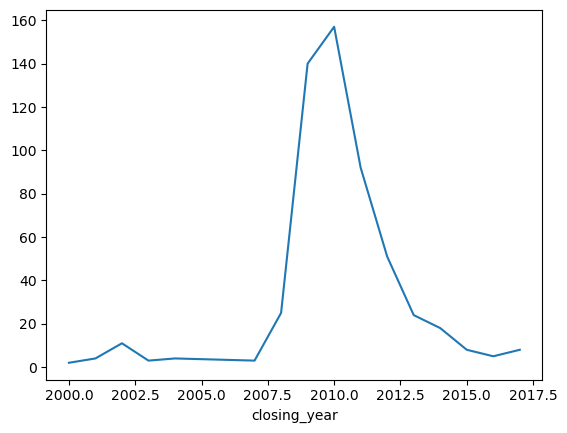

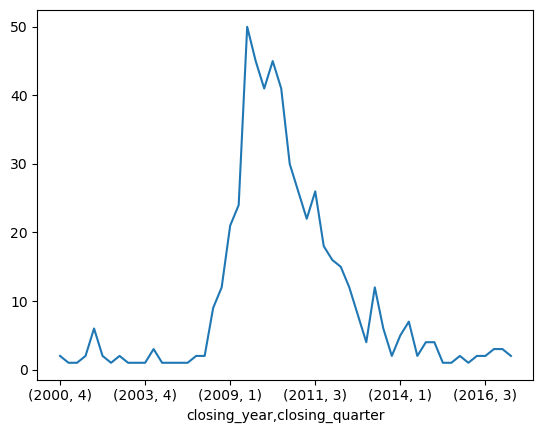

In [89]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

## 테슬라 주식 데이터로 시간 계산하기 

- pandas-datareader : 주식 데이터 불러오기 가능 
- TSLA : 지금은 종목이 없어져서 새로운 종목 문자열로 서치하는 노력이 필요 
- datetime 오브젝트로 자료형을 변환해야 시간 계산 가능 
- parse_dates인자에 date열 전달 -> date열을 datetime형으로 변환

## datetime 오브젝트와 인덱스 - DatetimeIndex

- 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출 가능 

In [91]:
!pip install pandas-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 3.3 MB/s eta 0:00:00


In [101]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

In [107]:
#TSLA 데이터셋은 2018년에 종료됨
tesla = pdr.get_data_quandl('WIKI/TSLA', api_key ='TbkX97fdM5DdWsMxoAfz' )

RemoteDataError: Unable to read URL: https://www.quandl.com/api/v3/datasets/WIKI/TSLA.csv?start_date=2020-03-25&end_date=2025-03-24&order=asc&api_key=TbkX97fdM5DdWsMxoAfz
Response Text:
b'<html style="height:100%"><head><META NAME="ROBOTS" CONTENT="NOINDEX, NOFOLLOW"><meta name="format-detection" content="telephone=no"><meta name="viewport" content="initial-scale=1.0"><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><script type="text/javascript" src="/_Incapsula_Resource?SWJIYLWA=719d34d31c8e3a6e6fffd425f7e032f3"></script></head><body style="margin:0px;height:100%"><iframe id="main-iframe" src="/_Incapsula_Resource?CWUDNSAI=23&xinfo=2-1544431-0%200NNN%20RT%281742747029435%2049%29%20q%280%20-1%20-1%20-1%29%20r%280%20-1%29%20B15%2811%2c3946292%2c0%29%20U18&incident_id=1589000310054607098-9918574239221698&edet=15&cinfo=0b000000&rpinfo=0&mth=GET" frameborder=0 width="100%" height="100%" marginheight="0px" marginwidth="0px">Request unsuccessful. Incapsula incident ID: 1589000310054607098-9918574239221698</iframe></body></html>'

In [111]:
#tesla에 저장된 데이터프레임을 파일로 저장합니다

#tesla.to_csv('/Users/josoobin/documents/data/tesla_stock_quandl.csv')

tesla = pd.read_csv('/Users/josoobin/documents/data/tesla_stock_quandl.csv')
print(tesla.head())

         Date    Open    High     Low   Close      Volume  ExDividend  \
0  2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1  2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2  2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3  2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4  2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


In [117]:
tesla = pd.read_csv('/Users/josoobin/documents/data/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [119]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


In [129]:
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


- 책에서는 tesla['2015'] 혹은 tesla['2010=06'] 으로 해도 동작하였던 이유는 columns에 컬럼이 실제로 존재했던 예제였거나, multiindex or 시계열 데이터였을 가능성이 큼.
- 그러므로 책에서는 코드가 정상적으로 작동하였으나, 지금 상황에서는 칼럼이 아니라 인덱스 이므로 인덱스를 따로 출력하는 과정이 필요함.

In [135]:
# print(tesla['2015'].iloc[:5, :5])

tesla.index = pd.to_datetime(tesla.index)

tesla_2015 = tesla[tesla.index.year == 2015]
print(tesla_2015.iloc[5:, :5])

                 Date    Open      High       Low    Close
Date                                                      
2015-12-23 2015-12-23  232.18  233.4500  228.1300  229.700
2015-12-22 2015-12-22  234.99  236.5500  229.6300  229.950
2015-12-21 2015-12-21  231.69  235.8300  231.0800  232.560
2015-12-18 2015-12-18  232.89  235.9000  229.2900  230.460
2015-12-17 2015-12-17  233.94  237.7600  229.8149  233.390
...               ...     ...       ...       ...      ...
2015-01-08 2015-01-08  212.81  213.7999  210.0100  210.615
2015-01-07 2015-01-07  213.35  214.7800  209.7800  210.950
2015-01-06 2015-01-06  210.06  214.2000  204.2100  211.280
2015-01-05 2015-01-05  214.55  216.5000  207.1626  210.090
2015-01-02 2015-01-02  222.87  223.2500  213.2600  219.310

[247 rows x 5 columns]


In [137]:
#print(tesla['2010-06'].iloc[:,:5])

tesla.index = pd.to_datetime(tesla.index)
print(tesla.loc['2010-06'].iloc[:, :5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


## 시간 간격과 인덱스 - TimedeltaIndex

- 특정 기간의 데이터만 살펴보고 싶을 때 시간 간격을 인덱스로 지정하여 데이터 추출하기
- datetime 오브젝트를 인덱스로 지정하는 것이 아니라 시간 간격을 인덱스로 지정한다는 점 유의.

## 시간 범위와 인덱스

- 특정 일에 누락된 데이터도 포함시켜 살펴보기 위해서는 임의로 시간 범위를 설정한 뒤 이를 인덱스로 지정해야 함.
- date_range 메서드 사용 

In [139]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [141]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5 , :5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [143]:
print(tesla['5 days':].iloc[:5 , :5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


In [145]:
ebola = pd.read_csv('/Users/josoobin/documents/data/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [149]:
print(ebola.iloc[-5: ,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [151]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


- 원본데이터 손상을 방지하기 위해 데이터프레임 앞쪽 5개의 데이터를 추출해 새로운 데이터프레임 만듦
- Date열을 인덱스로 먼저 지정한 뒤 시간 범위를 그 다음으로 인덱스 지정해야 함.

In [155]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


In [217]:
# B : 평일만 포함
# 시간 범위 주기 설정 - freq 속성값을 지정 (자세한 표현은 p.263 참고)

print(pd.date_range('2017-01-01','2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


## 시간 범위 수정하고 데이터 밀어내기 - Shift 메서드

- 다양한 것을 비교하기 위해서는 같은 출발선에서부터 비교하는 것이 좋고 이를 위해 시작 시점을 옮기는 과정이 필요.
- Date열을 인덱스로 지정한 다음 ebola 데이터프레임의 Date열의 최댓값과 최솟값으로 시간 범위를 설정해 새로운 변수에 지정
- 시간 순서가 반대로 되어 있다면 reverse 메서드 사용하기

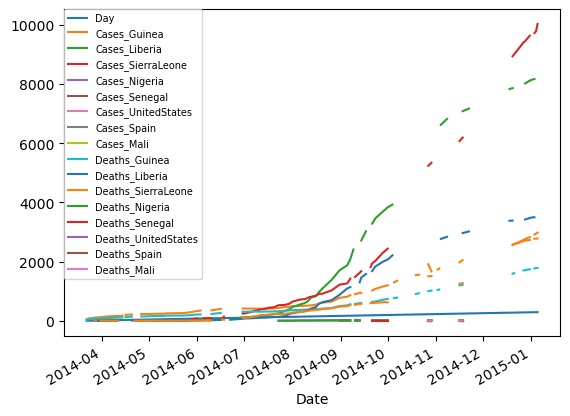

In [159]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fid, ax = plt.subplots()
ax =ebola.iloc[0:, 1:].plot(ax=ax)

ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [161]:
ebola_sub = ebola[['Day','Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [165]:
ebola = pd.read_csv('/Users/josoobin/documents/data/country_timeseries.csv', parse_dates=['Date'])

print(ebola.head().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [167]:
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [169]:
print(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [171]:
new_idx = reversed(new_idx)

In [173]:
ebola = ebola.reindex(new_idx)
print(ebola.head().iloc[:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [175]:
print(ebola.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


In [177]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [179]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [181]:
earlist_date = ebola.index.min()
print(earlist_date)

2014-03-22 00:00:00


In [183]:
shift_values = last_valid - earlist_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [185]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

/var/folders/7x/pz16cm357p9g4lfwv8fcq6fw0000gn/T/ipykernel_1577/114921738.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days


In [187]:
ebola_shift = pd.DataFrame(ebola_dict)

In [189]:
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [191]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date','Day'], axis=1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

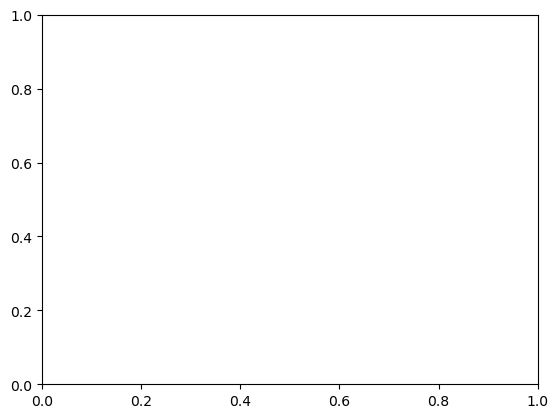

In [195]:
fig. ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()